**ML-2 Project - Dataset 3 - Energy Consumption Prediction (Regression)**
(https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)


Comparison between state of the art ML algorithms (Random Forest, XGBoost, SVM, Logistic Regression for classification and Multiple Linear Regression, SVM Regression, and Random Forest Regression for regression) and MCMC Methods. 

- **Call Center Data:**
https://www.kaggle.com/satvicoder/call-center-data?select=Call+Center+Data.csv

- **Inventory Demand:**
https://www.kaggle.com/flenderson/sales-analysis

- **Sales Forecasting (through Regression):**
https://www.kaggle.com/aungpyaeap/supermarket-sales

- **Telecom Churn:**
https://www.kaggle.com/jpacse/datasets-for-churn-telecom
    * LoS prediction on Tabba dataset (Nafeesa, extension of ML-1 project)

- **Credit Card Fraud:**
https://www.kaggle.com/mlg-ulb/creditcardfraud

- **Marketing Campaign:**
https://www.kaggle.com/rodsaldanha/arketing-campaign




All analyses to be performed in the notebook (no need to write a report). For your analyses, use Markdown cells
- Select any one of the above datasets
- Clean the dataset if needed
- Perform EDA thoroughly (as taught in ML-1) and write down analyses
- Determine the column to be predicted and the predictors
- Do some research to determine the prior and the likelihood functions along with proper justifications.
- Perform ML on your dataset using the set of classification/regression algorithms as outlined above
- Perform MCMC and compare the predictive results thoroughly with ML results



**Bonus marks to be given for following a cleaning/EDA template, ML template and MCMC template (Note: you can merge all three above into one single template)**

**Bonus marks to be given for using multiple performance measures with predictive results demonstrated thoroughly through all relevant graphs and tables**

*Basically, marks will be given on how well you are able to design the MCMC problem so that the results are at par or better than ML results (in fact, this is the whole project). You will need to do much research on designing the likelihood and the priors and also on the selection of the predictors. Remember that MCMC methods are slower than ML algorithms but they might be more effective in the long run.  Also tune for hyperparameters for both ML and MCMC methods.* 


**Deadline: 31st December, 2021**


**Required:**

- Notebook (all analyses within)

- A 2-3 minute video of your project - basically  a notebook demo

**Some more datasets to try:**

- https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

- https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

- https://archive.ics.uci.edu/ml/datasets/Cargo+2000+Freight+Tracking+and+Tracing

- https://archive.ics.uci.edu/ml/datasets/Educational+Process+Mining+%28EPM%29%3A+A+Learning+Analytics+Data+Set



In [1]:
try:
    from xgboost import XGBClassifier
except:
    print("Failed to import xgboost, make sure you have xgboost installed")
    print("Use following command to install it: pip install xgboost")
    XGBClassifier = None

try:
    import lightgbm as lgb
except:
    print("Failed to import lightgbm, make sure that you have lightgbm installed")
    print("Use following command to install it: conda install -c conda-forge lightgbm")
    lgb = None
    
#importing multiprocessing to keep up with the compute power needed
import multiprocessing


#import basic modules
import pandas as pd 
import numpy as np
import seaborn as sb
import math
import warnings
import matplotlib.pyplot as plt        
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn import preprocessing

#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import mutual_info_regression

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# import regression modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

#import split methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#import performance scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score

#import regularization libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

# import scaling
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
sb.set(color_codes=True, font_scale=1.2)

#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano
import datetime
import string
from sklearn.impute import KNNImputer
%matplotlib inline
import tkinter as tk
from tkinter import filedialog
import pylab 
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sb

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")
sb.set(color_codes=True, font_scale=1.2)

from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#importing class balancing libraries
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
#Importing my personal data wrangling and MVA template developed in ML 1 class
from Yawar_Wrangling_Template import yawar_wrangling_KNN as wrn

# Importing my personal ML Algorithms template developed in ML 1 class
import Yawar_MLTemplate as ml

#Importing clustering playground

import ClusterPlayground_Yawar as clust

### Load and Summarise Dataset at hand

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). 

For more information about the house, data collection, R scripts and figures, please refer to the paper and to the following github repository: 



Attribute Information:

+ date time year-month-day hour:minute:second 
+ Appliances, energy use in Wh 
+ lights, energy use of light fixtures in the house in Wh 
+ T1, Temperature in kitchen area, in Celsius 
+ RH_1, Humidity in kitchen area, in % 
+ T2, Temperature in living room area, in Celsius 
+ RH_2, Humidity in living room area, in % 
+ T3, Temperature in laundry room area 
+ RH_3, Humidity in laundry room area, in % 
+ T4, Temperature in office room, in Celsius 
+ RH_4, Humidity in office room, in % 
+ T5, Temperature in bathroom, in Celsius 
+ RH_5, Humidity in bathroom, in % 
+ T6, Temperature outside the building (north side), in Celsius 
+ RH_6, Humidity outside the building (north side), in % 
+ T7, Temperature in ironing room , in Celsius 
+ RH_7, Humidity in ironing room, in % 
+ T8, Temperature in teenager room 2, in Celsius 
+ RH_8, Humidity in teenager room 2, in % 
+ T9, Temperature in parents room, in Celsius 
+ RH_9, Humidity in parents room, in % 
+ To, Temperature outside (from Chievres weather station), in Celsius 
+ Pressure (from Chievres weather station), in mm Hg 
+ RH_out, Humidity outside (from Chievres weather station), in % 
+ Wind speed (from Chievres weather station), in m/s 
+ Visibility (from Chievres weather station), in km 
+ Tdewpoint (from Chievres weather station), Â°C 
+ rv1, Random variable 1, nondimensional 
+ rv2, Random variable 2, nondimensional 

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data. 

In [3]:
# Defining function | Also present in our template
def read_csv(filename):
    try:
        df= pd.read_csv(filename, skipinitialspace=True)
    except:
        df= pd.read_csv(filename, skipinitialspace=True)
        
    return df


#loading df

FILE_NAME = 'energydata_complete.csv'
#LABEL_COL = "lights"

df = read_csv(FILE_NAME)

print('\nDATA PREVIEW:')
display(df.head())
print('\nDATA SHAPE:')
print(df.shape)
print('\nCOLUMN DATA TYPES:')
print(df.dtypes)


DATA PREVIEW:


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097



DATA SHAPE:
(19735, 29)

COLUMN DATA TYPES:
date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


### Checking MVs

date           0
T7             0
rv1            0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
RH_6           0
Appliances     0
T6             0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
rv2            0
dtype: int64


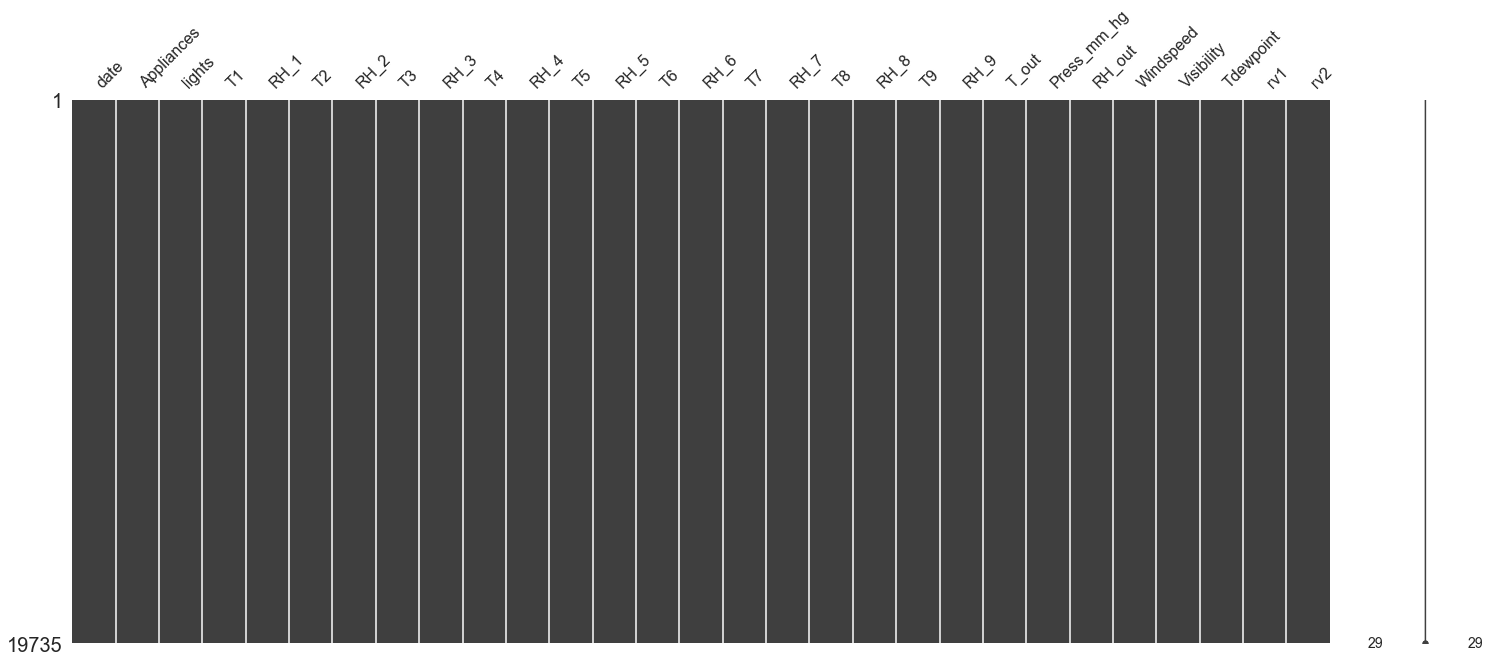

In [4]:
#Defining functionsto check MV
def check_mv(df):
        print(df.isnull().sum().sort_values(ascending=False))
        mano.matrix(df)


#checking Missing values

check_mv(
    df
)

#mano.matrix(df)

## Wrangling 

In [5]:
def cleaningup(df, to_date=[], to_numeric=[], cols_to_delete=[], fill_na_map={}, cols_to_drop_na_rows=[], cols_to_interpolate=[]):
    """
    We will perform all the generic cleanup stuff in this function,
    Data specific stuff should be handled by driver program.
    
    Mandatory Parameter:
    df : Dataframe to be cleaned
    
    Optional Parameters:
    to_date:  List of columns to convert to date
    to_numeric:  List of columns to convert to numeric
    cols_to_delete: All the useless columns that we need to delete from our dataset
    fill_na_map:  A dictionary containing map for column and a value to be filled in missing places
                    e.g. {'age': df['age'].median(), 'city': 'Karachi'}
    cols_to_drop_na_rows: List of columns where missing value in not tolerable and we couldn't risk predicting                     value for it, so we drop such rows.
    cols_to_interpolate: List of columns where missing values have to be replaced by forward interpolation
    """
    
    # columns to convert to date format
    def change_type_to_date(df, to_date):
        # Deal with incorrect data in date column
        for i in to_date:
            df[i] = pd.to_datetime(df[i], errors='coerce', infer_datetime_format=True)
        return df
    
    # columns to convert to numerical format
    def change_type_to_numeric(df, to_numeric):
        # Deal with incorrect data in numeric columns
        for i in to_numeric:
            df[i] = pd.to_numeric(df[i], errors='coerce')
        return df
    
    # columns to delete
    def drop_useless_colums(df, cols_to_delete):
        # Drop useless columns before dealing with missing values
        for i in cols_to_delete:
            df = df.drop(i, axis=1)
        return df
    
    # delete columns that have more than n% MV
    def drop_by_mvpercent(df,n):
        for i in df:
            y=df[i].isnull().sum()
            w=y/len(df[i])*100
            print(w)
            
            if w>n:
                df.drop(i,axis=1,inplace=True)
        
        return df
    
    #drop all rows which contain more than 40% missing values
    def drop_useless_rows(df):
        min_threshold = math.ceil(len(df.columns)*0.4)
        df = df.dropna(thresh=min_threshold)
        return df
    
    # drop rows in which columns specified by the driver program has missing values
    def drop_na_rows(df, cols_to_drop_na_rows):
        for i in cols_to_drop_na_rows:
            df = df.drop(df[df[i].isnull()].index)
        return df
    
    # Deal with missing values according to map, e.g., {'age': df['age'].median(), 'city': 'Karachi'}
    def fill_na_vals(df, fill_na_map):
        for col,val in fill_na_map.items():
            df[col].fillna(val, inplace=True)
        return df
    
    # Deal with missing values according to the interpolation
    def fill_na_interpolate(df, cols_to_interpolate):
        for i in cols_to_interpolate:
            df[i] = df[i].interpolate(method ='linear', limit_direction ='forward')
        return df
    
    try:
        df = change_type_to_date(df, to_date)
        df = change_type_to_numeric(df, to_numeric)
        df = drop_useless_colums(df, cols_to_delete)
        df = drop_useless_rows(df)
        df = drop_na_rows(df, cols_to_drop_na_rows)
        df = fill_na_vals(df, fill_na_map)
        df = fill_na_interpolate(df, cols_to_interpolate)
        print("df is all cleaned up..")
        return df
    except Exception as e:
        print("Failed to perform cleanup, exception=%s" % str(e))
    finally:
        return df

In [6]:
df['total_energy'] = df['Appliances'] + df ['lights']

LABEL_COL = 'total_energy'

In [7]:
#Dropping appliances and lights column since we have aggregated that to total_energy

df = cleaningup(df, cols_to_delete=['lights', 'Appliances'])
df.head()

df is all cleaned up..


,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,total_energy
0,2016-01-11 17:00:00,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,90
1,2016-01-11 17:10:00,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,90
2,2016-01-11 17:20:00,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,80
3,2016-01-11 17:30:00,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,90
4,2016-01-11 17:40:00,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,100


In [8]:
#Converting the  date columns to date_time dtype
df = cleaningup(df, to_date=['date'])

df is all cleaned up..


<AxesSubplot:xlabel='date'>

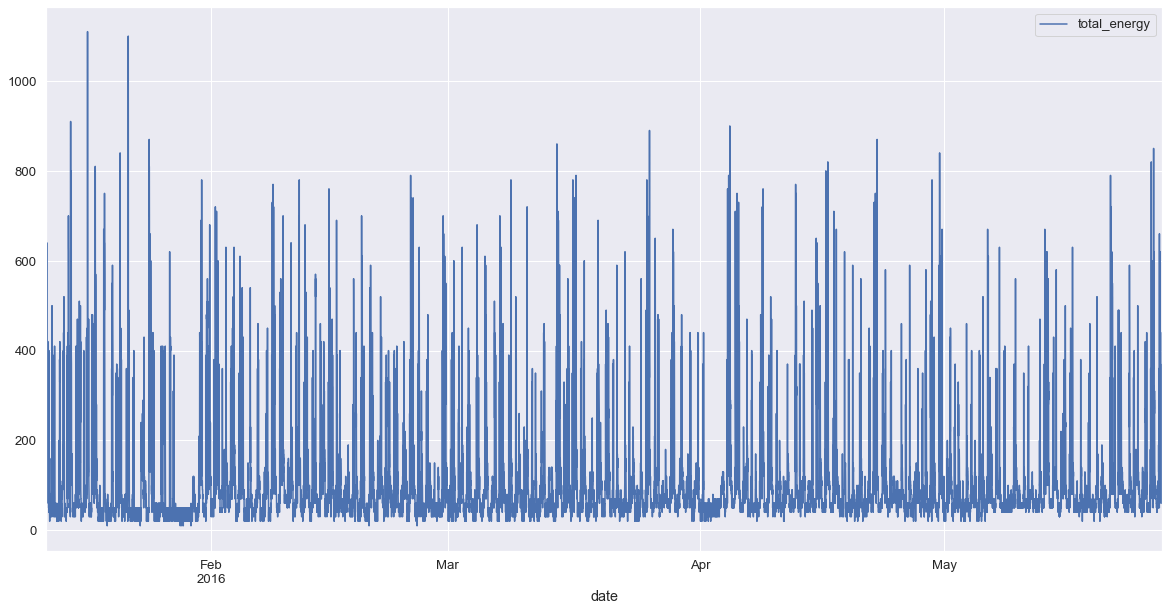

In [9]:
#Energy consumption by date
df.plot('date', 'total_energy', figsize=(20,10))

### Exploratory Data Analysis and Visualization

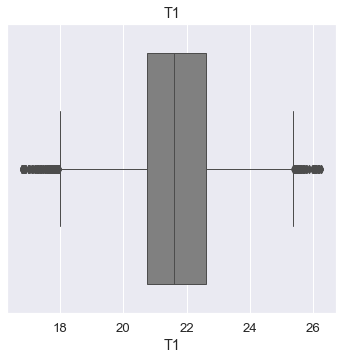

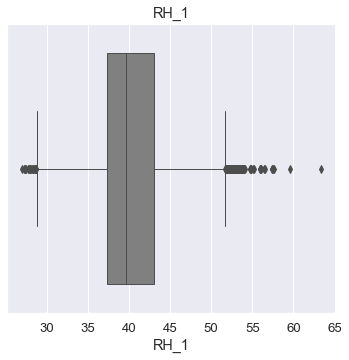

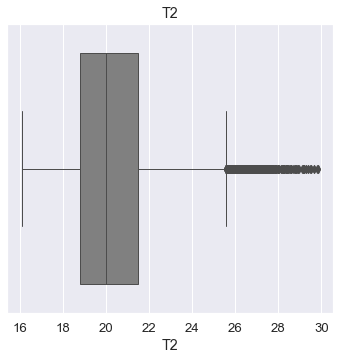

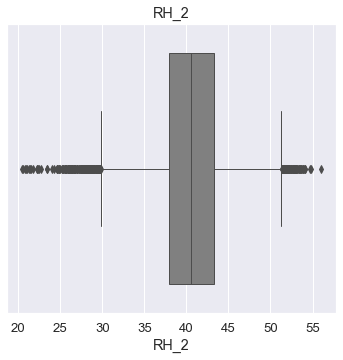

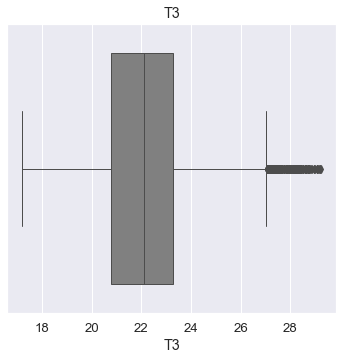

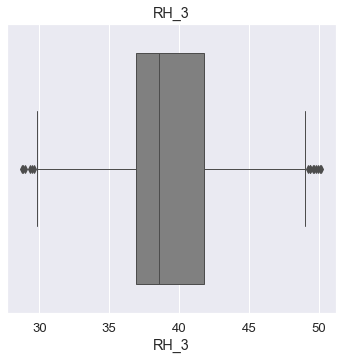

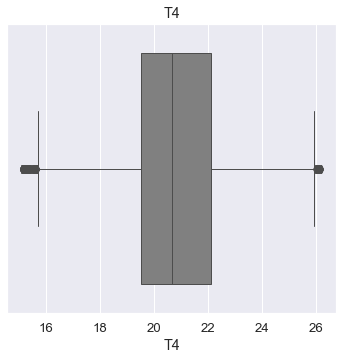

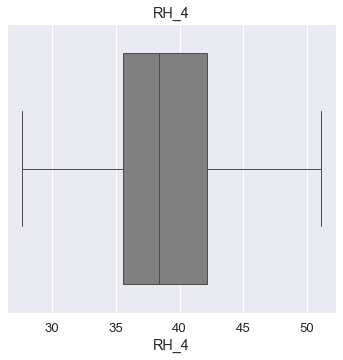

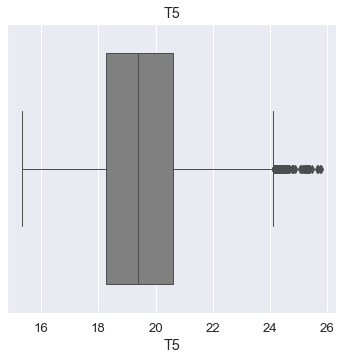

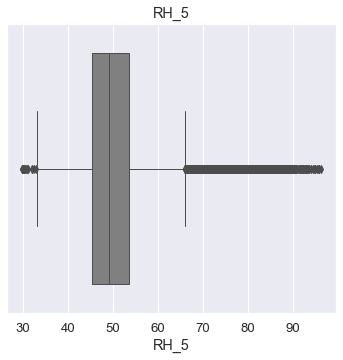

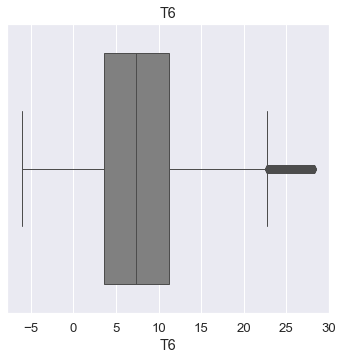

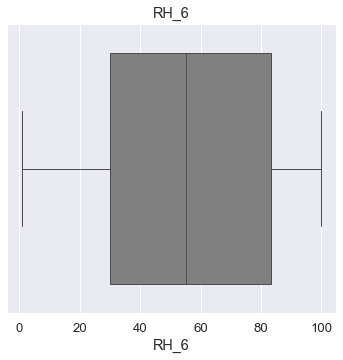

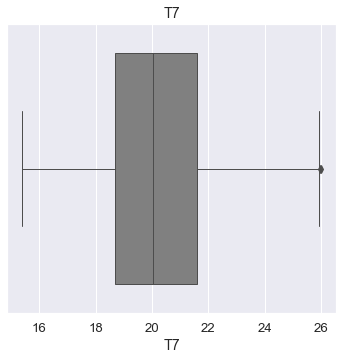

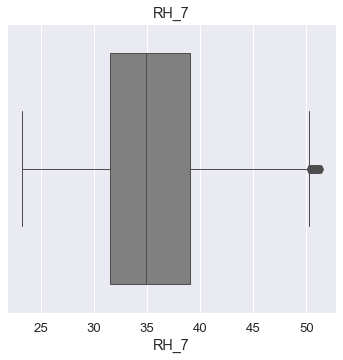

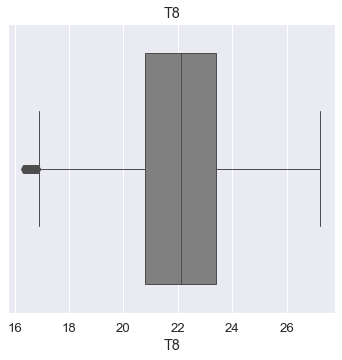

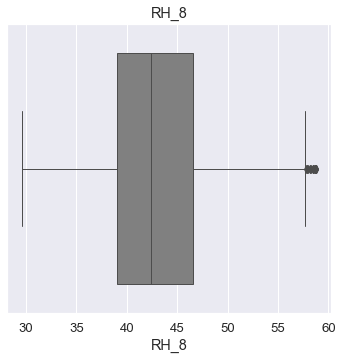

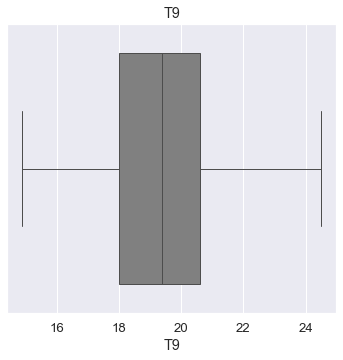

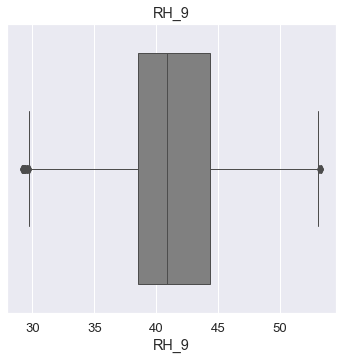

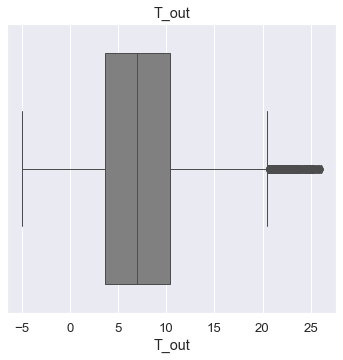

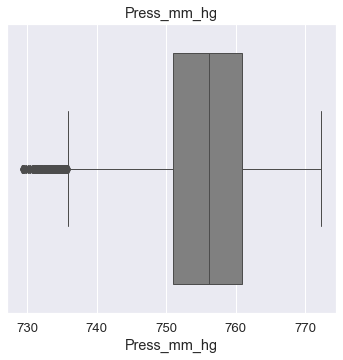

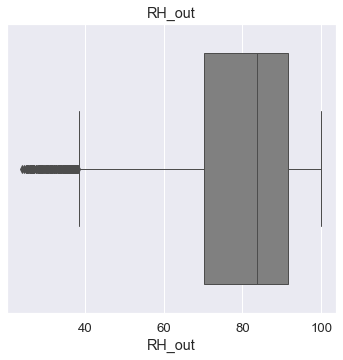

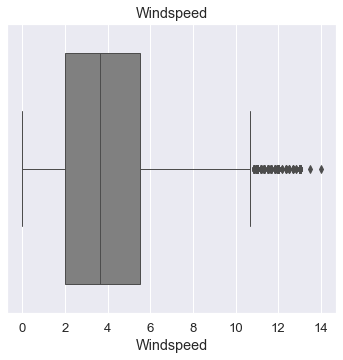

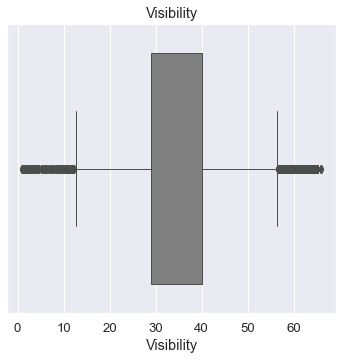

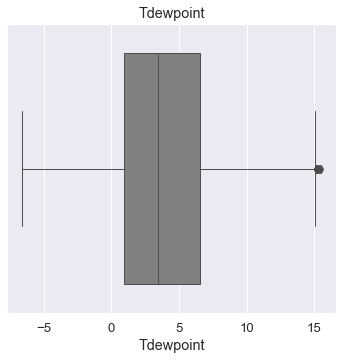

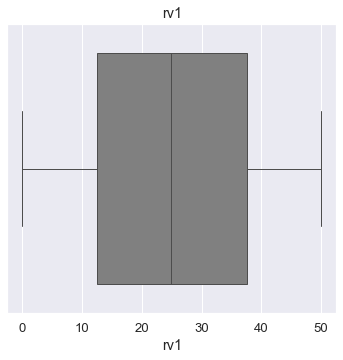

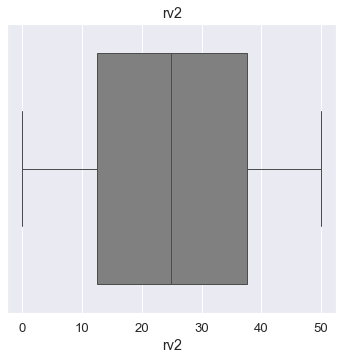

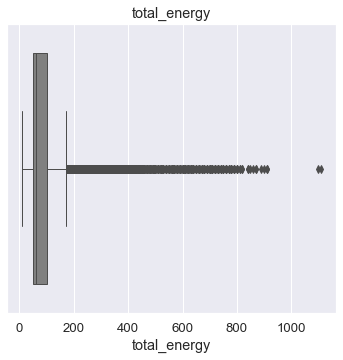

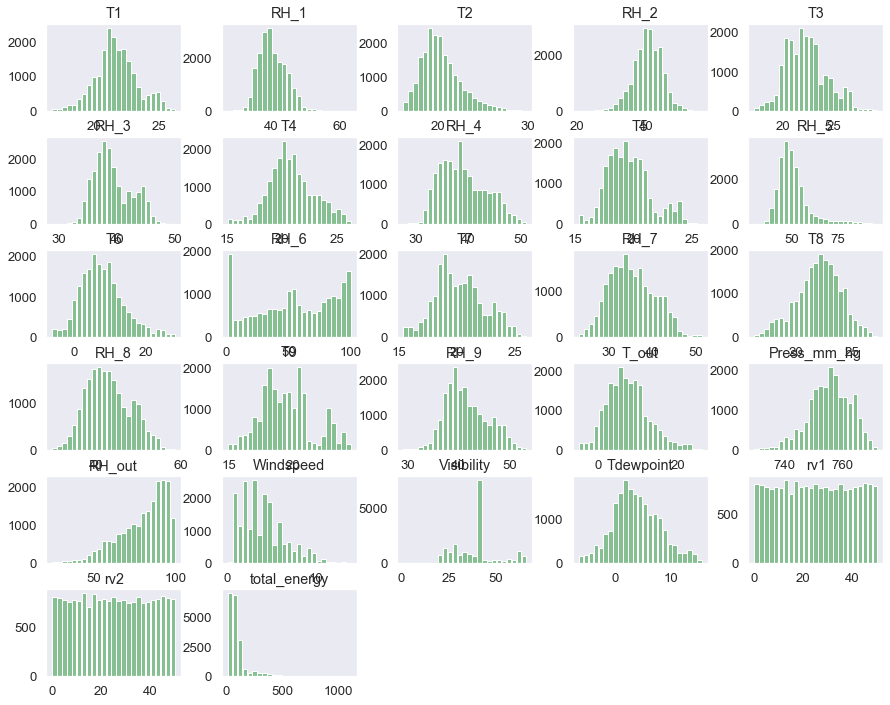

In [10]:
ml.numcolanalysis(df)

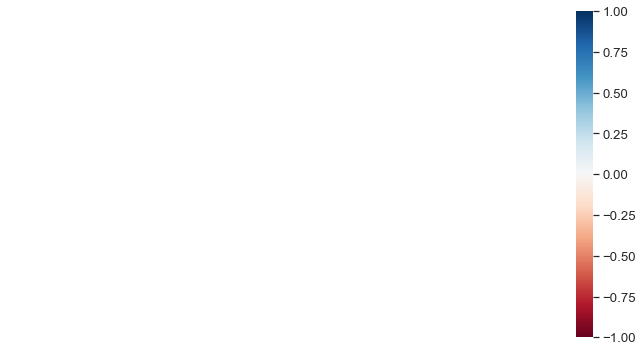

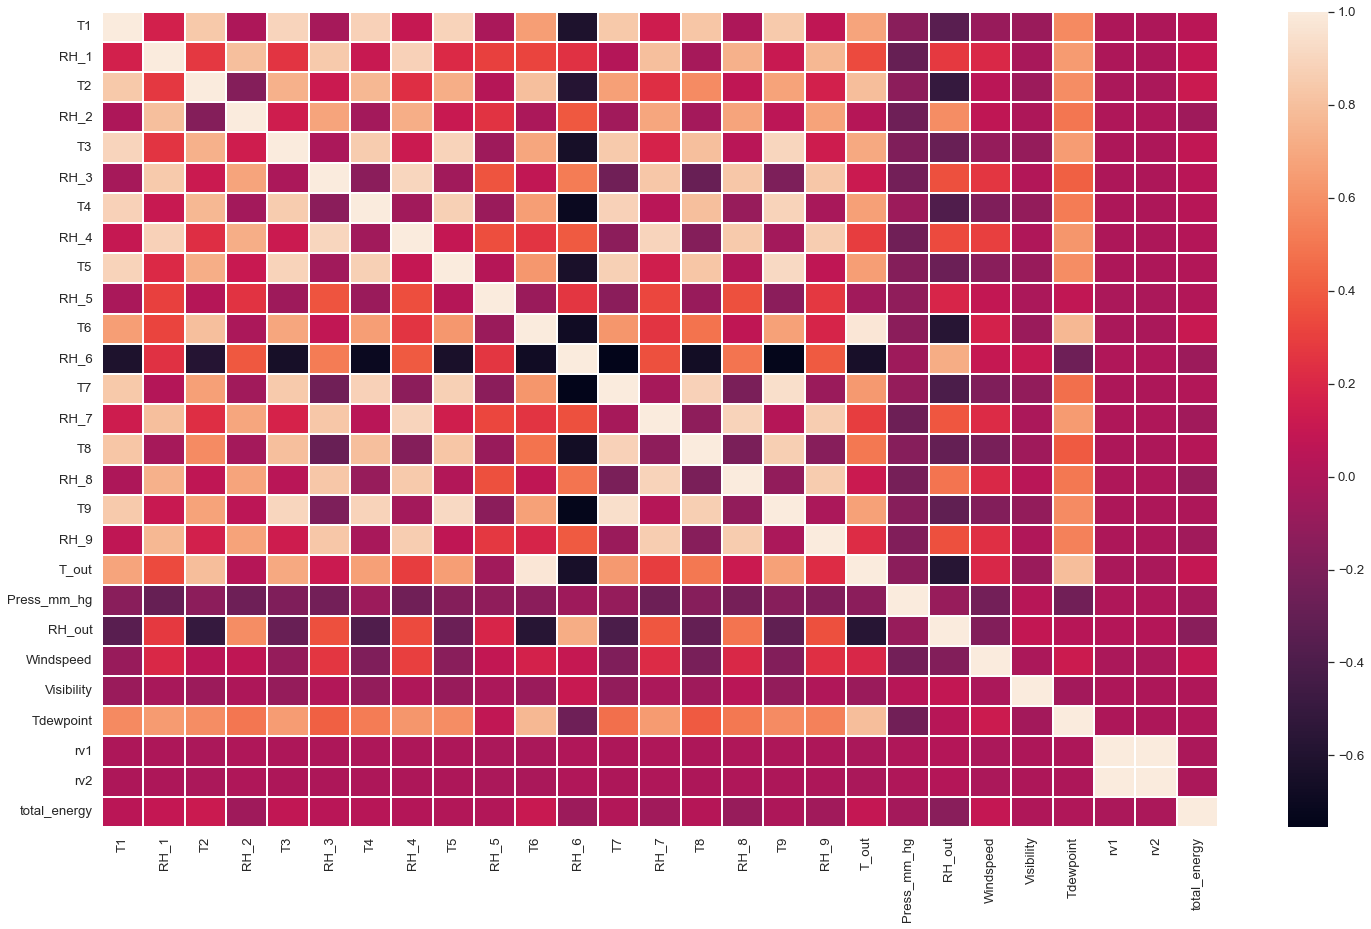

In [11]:
ml.heat_map(df)

In [12]:
ml.anova_test(df, LABEL_COL , 'date')

f val: 3592557851.905156
p val: 0.0


In [13]:
ml.normalcy_test(df, LABEL_COL)

Output: 2618.1100
15.0000: 0.5760, data not look normal (reject H0)
10.0000: 0.6560, data not look normal (reject H0)
5.0000: 0.7870, data not look normal (reject H0)
2.5000: 0.9180, data not look normal (reject H0)
1.0000: 1.0920, data not look normal (reject H0)


## Pre-Processing

In [14]:
df['date_year'] = df['date'].dt.year
df['date_month'] = df['date'].dt.month
df['date_week'] = df['date'].dt.week
df['date_day'] = df['date'].dt.day
df['date_hour'] = df['date'].dt.hour
df['date_minute'] = df['date'].dt.minute
df['date_dayofweek'] = df['date'].dt.dayofweek

In [15]:
df

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,rv1,rv2,total_energy,date_year,date_month,date_week,date_day,date_hour,date_minute,date_dayofweek
0,2016-01-11 17:00:00,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,13.275433,13.275433,90,2016,1,2,11,17,0,0
1,2016-01-11 17:10:00,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,18.606195,18.606195,90,2016,1,2,11,17,10,0
2,2016-01-11 17:20:00,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,28.642668,28.642668,80,2016,1,2,11,17,20,0
3,2016-01-11 17:30:00,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,45.410389,45.410389,90,2016,1,2,11,17,30,0
4,2016-01-11 17:40:00,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,10.084097,10.084097,100,2016,1,2,11,17,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,43.096812,43.096812,100,2016,5,21,27,17,20,4
19731,2016-05-27 17:30:00,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,49.282940,49.282940,90,2016,5,21,27,17,30,4
19732,2016-05-27 17:40:00,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,29.199117,29.199117,280,2016,5,21,27,17,40,4
19733,2016-05-27 17:50:00,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,6.322784,6.322784,430,2016,5,21,27,17,50,4


In [16]:
#Dropping date column

df = cleaningup(df, cols_to_delete=['date'])
df.head()

df is all cleaned up..


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,rv1,rv2,total_energy,date_year,date_month,date_week,date_day,date_hour,date_minute,date_dayofweek
0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,...,13.275433,13.275433,90,2016,1,2,11,17,0,0
1,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,...,18.606195,18.606195,90,2016,1,2,11,17,10,0
2,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,...,28.642668,28.642668,80,2016,1,2,11,17,20,0
3,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,...,45.410389,45.410389,90,2016,1,2,11,17,30,0
4,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,...,10.084097,10.084097,100,2016,1,2,11,17,40,0


# REGRESSION ML ALGOS

In [17]:
#Helper

#Train Test Split: splitting manually
def traintestsplit(df,split,random=None, label_col=''):
    #make a copy of the label column and store in y
    y = df[label_col].copy()
    
    #now delete the original
    X = df.drop(label_col,axis=1)
    
    #manual split
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    return X, trainX, testX, trainY, testY

#helper function which only splits into X and y
def XYsplit(df, label_col):
    y = df[label_col].copy()
    X = df.drop(label_col,axis=1)
    return X,y

#Validation metrics for Regression algorithms
def validationmetrics_reg(model,testX,testY, verbose=True):
    predictions = model.predict(testX)
    
    # R-squared
    r2 = r2_score(testY,predictions)
    
    # Adjusted R-squared
    r2_adjusted = 1-(1-r2)*(testX.shape[0]-1)/(testX.shape[0]-testX.shape[1]-1)
    
    # MSE
    mse = mean_squared_error(testY,predictions)
    
    #RMSE
    rmse = math.sqrt(mse)
    
    if verbose:
        print("R-Squared Value: ", r2)
        print("Adjusted R-Squared: ", r2_adjusted)
        print("RMSE: ", rmse)
    
    res_map = {
                "r2": r2,
                "r2_adjusted": r2_adjusted,
                "rmse": rmse,
                "model_obj": model
              }
    return res_map

In [18]:
X,y = XYsplit(df,LABEL_COL)

In [19]:
# Regression Algorithms
def LinearReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LinearRegression()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def RandomForestReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = RandomForestRegressor(n_estimators=100)
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def PolynomialReg(trainX, testX, trainY, testY, degree=3, verbose=True, clf=None):
    poly = PolynomialFeatures(degree = degree)
    X_poly = poly.fit_transform(trainX)
    poly.fit(X_poly, trainY)
    if not clf:
        clf = LinearRegression() 
    clf.fit(X_poly, trainY)
    return validationmetrics_reg(clf, poly.fit_transform(testX), testY, verbose=verbose)

def SupportVectorRegression(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = SVR(kernel="rbf")
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def DecisionTreeReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = DecisionTreeRegressor()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def GradientBoostingReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingRegressor()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def AdaBooostReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = AdaBoostRegressor(random_state=0, n_estimators=100)
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def VotingReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    lr = LinearRegression()
    rf = RandomForestRegressor(n_estimators=100)
    sv = SVR(kernel="rbf")
    dt = DecisionTreeRegressor()
    gb = GradientBoostingRegressor()
    ab = AdaBoostRegressor(random_state=0, n_estimators=100)
    if not clf:
        clf = VotingRegressor([('rf', rf), ('dt', dt), ('gb', gb), ('ab', ab)])
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

In [20]:
#first split dataframe into x (predictors) and y (label)

def regression_ML(x, y, n= 0.2):
    
    trainX, testX, trainY, testY = train_test_split(x, y, test_size=n)
    
    c= str(input('Which Regression Algo?\n\n[LinearReg, RandomForestReg, PolynomialReg, SupportVectorRegression, DecisionTreeReg, GradientBoostingReg,\nAdaBooostReg,VotingReg]\n'))
    
    
    if c =='LinearReg':
        print('applying Linear Regression regression algorithm without FS, REG or CV....\n\n')
        LinearReg(trainX, testX, trainY, testY)
        
    elif c =='RandomForestReg':
        print('applying RandomForestReg algorithm without FS, REG or CV....\n\n')
        RandomForestReg(trainX, testX, trainY, testY)
        
    elif c =='PolynomialReg':
        print('applying PolynomialReg algorithm without FS, REG or CV....\n\n')
        PolynomialReg(trainX, testX, trainY, testY)
        
    elif c =='SupportVectorRegression':
        print('applying SupportVectorRegression algorithm without FS, REG or CV....\n\n')
        SupportVectorRegression(trainX, testX, trainY, testY)
        
    elif c =='DecisionTreeReg':
        print('applying DecisionTreeReg algorithm without FS, REG or CV....\n\n')
        DecisionTreeReg(trainX, testX, trainY, testY)
        
    elif c =='GradientBoostingReg':
        print('applying GradientBoostingReg algorithm without FS, REG or CV....\n\n')
        GradientBoostingReg(trainX, testX, trainY, testY)
        
    elif c =='AdaBooostReg':
        print('applying AdaBooostReg algorithm without FS, REG or CV....\n\n')
        AdaBooostReg(trainX, testX, trainY, testY)
        
    elif c =='VotingReg':
        print('applying VotingReg algorithm without FS, REG or CV....\n\n')
        VotingReg(trainX, testX, trainY, testY)
        
    else:
        print('\ninvalid classification algo entered ... check exact match from list')

In [21]:
regression_ML(X,y, n=0.2)

Which Regression Algo?

[LinearReg, RandomForestReg, PolynomialReg, SupportVectorRegression, DecisionTreeReg, GradientBoostingReg,
AdaBooostReg,VotingReg]
LinearReg
applying Linear Regression regression algorithm without FS, REG or CV....


R-Squared Value:  0.17733174830289578
Adjusted R-Squared:  0.1703938356256649
RMSE:  92.6225182420124


In [22]:
regression_ML(X,y, n=0.2)

Which Regression Algo?

[LinearReg, RandomForestReg, PolynomialReg, SupportVectorRegression, DecisionTreeReg, GradientBoostingReg,
AdaBooostReg,VotingReg]
RandomForestReg
applying RandomForestReg algorithm without FS, REG or CV....


R-Squared Value:  0.6132820112864752
Adjusted R-Squared:  0.6100206533443473
RMSE:  67.14528096610533


In [23]:
regression_ML(X,y, n=0.2)

Which Regression Algo?

[LinearReg, RandomForestReg, PolynomialReg, SupportVectorRegression, DecisionTreeReg, GradientBoostingReg,
AdaBooostReg,VotingReg]
PolynomialReg
applying PolynomialReg algorithm without FS, REG or CV....


R-Squared Value:  0.34254531207729666
Adjusted R-Squared:  1.8122467747473348
RMSE:  85.2926176225033


In [24]:
regression_ML(X,y, n=0.2)

Which Regression Algo?

[LinearReg, RandomForestReg, PolynomialReg, SupportVectorRegression, DecisionTreeReg, GradientBoostingReg,
AdaBooostReg,VotingReg]
SupportVectorRegression
applying SupportVectorRegression algorithm without FS, REG or CV....


R-Squared Value:  -0.14096100216522323
Adjusted R-Squared:  -0.15058321353027626
RMSE:  111.27553235907217


In [25]:
regression_ML(X,y, n=0.2)

Which Regression Algo?

[LinearReg, RandomForestReg, PolynomialReg, SupportVectorRegression, DecisionTreeReg, GradientBoostingReg,
AdaBooostReg,VotingReg]
DecisionTreeReg
applying DecisionTreeReg algorithm without FS, REG or CV....


R-Squared Value:  0.22265059064823867
Adjusted R-Squared:  0.21609487112137737
RMSE:  90.99985104824701


In [26]:
regression_ML(X,y, n=0.2)

Which Regression Algo?

[LinearReg, RandomForestReg, PolynomialReg, SupportVectorRegression, DecisionTreeReg, GradientBoostingReg,
AdaBooostReg,VotingReg]
GradientBoostingReg
applying GradientBoostingReg algorithm without FS, REG or CV....


R-Squared Value:  0.31380496204645214
Adjusted R-Squared:  0.30801798625997956
RMSE:  84.67706464157604


In [27]:
regression_ML(X,y, n=0.2)

Which Regression Algo?

[LinearReg, RandomForestReg, PolynomialReg, SupportVectorRegression, DecisionTreeReg, GradientBoostingReg,
AdaBooostReg,VotingReg]
AdaBooostReg
applying AdaBooostReg algorithm without FS, REG or CV....


R-Squared Value:  -0.39917781552861054
Adjusted R-Squared:  -0.41097767954916864
RMSE:  127.78305618953107


In [28]:
regression_ML(X,y, n=0.2)

Which Regression Algo?

[LinearReg, RandomForestReg, PolynomialReg, SupportVectorRegression, DecisionTreeReg, GradientBoostingReg,
AdaBooostReg,VotingReg]
VotingReg
applying VotingReg algorithm without FS, REG or CV....


R-Squared Value:  0.42577466906125183
Adjusted R-Squared:  0.4209319816293636
RMSE:  81.93869006609388


## Part 1b: With FS

In [29]:
# Helper function to provide list of supported algorithms for Regression
def get_supported_algorithms_reg():
    covered_algorithms = [LinearReg, RandomForestReg, PolynomialReg, SupportVectorRegression,
                          DecisionTreeReg, GradientBoostingReg, AdaBooostReg, VotingReg]
    return covered_algorithms

def run_algorithms(df, label_col, algo_list=get_supported_algorithms_reg(), feature_list=[]):
    """
    Run Algorithms with manual split
    
    """
    # Lets make a copy of dataframe and work on that to be on safe side 
    _df = df.copy()
    
    if feature_list:
        impftrs = feature_list
        impftrs.append(label_col)
        _df = _df[impftrs]
    
    _df, trainX, testX, trainY, testY = traintestsplit(_df, 0.2, 91, label_col=label_col)
    algo_model_map = {}
    for algo in algo_list:
        print("============ " + algo.__name__ + " ===========")
        res = algo(trainX, testX, trainY, testY)
        algo_model_map[algo.__name__] = res.get("model_obj", None)
        print ("============================== \n")
    
    return algo_model_map


def RFfeatureimportance(df, trainX, testX, trainY, testY, trees=35, random=None, regression=False):
    if regression:
        clf  = RandomForestRegressor(n_estimators=trees, random_state=random)
    else:
        clf  = RandomForestClassifier(n_estimators=trees, random_state=random)
    clf.fit(trainX,trainY)
    #validationmetrics(clf,testX,testY)
    res = pd.Series(clf.feature_importances_, index=df.columns.values).sort_values(ascending=False)*100
    print(res)
    return res

# Helper function to select important features via RFFS, run supported ML algorithms over dataset with manual split and measure accuracy without Cross Validation - select features with importance >=threshold
def MachineLearningwithRFFS(df, label_col, threshold=5, algo_list=get_supported_algorithms_reg(), regression=True):
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    df_cpy, trainX, testX, trainY, testY = traintestsplit(df_cpy, 0.2, 91, label_col=label_col)
    res = RFfeatureimportance(df_cpy, trainX, testX, trainY, testY, trees=10, regression=regression)
    
    impftrs = list(res[res > threshold].keys())
    #impftrs.append(label_col)
    
    print ("Selected Features =" + str(impftrs))
    print(df.shape)
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=impftrs)
    return {"selected_features": impftrs, "results": results}

# ## Mutual Information Feature Selection (MIFS) 
# MachineLearningwithMIFS() => Helper function to select important features and run supported ML algorithms over dataset

# mutualinformation()  => Helper function to get fetaure importance metrics via Mutual Information Classifier/Regressor.
def mutualinformation(df, label_col, regression=False):
    df_cpy = df.copy()
    y = df_cpy[label_col].copy()
    X = df_cpy.drop(label_col,axis=1)
    if regression:
        mutual_info = mutual_info_regression(X,y,random_state=35)
    else:
        mutual_info = mutual_info_classif(X,y,random_state=35)
    results = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)*100
    print(results)
    return results



# Helper function to select important features via MIFS, run supported ML algorithms over dataset with manual split and measure accuracy, without CV ... select features with importance >=threshold
def MachineLearningwithMIFS(df, label_col, threshold=5, algo_list=get_supported_algorithms_reg(), regression=True):
    
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    res = mutualinformation(df_cpy, label_col=label_col, regression=regression)
    
    #include all selected features in impftrs
    impftrs = list(res[res > threshold].keys())
    
    print ("Selected Features =" + str(impftrs))
    
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=impftrs)
    return {"selected_features": impftrs, "results": results}

# Helper function to select important features via REFS, run supported ML algorithms over dataset with manual split and measure accuracy, without CV ... select features with importance >=threshold
# flexible enough to use any algorithm for recursive feature elimination and any alogorithm to run on selected features
def GenericREFS(df, label_col,
                algo_list=get_supported_algorithms_reg(),
                re_algo=RandomForestClassifier,
                **kwargs):
    
    X,y = XYsplit(df, label_col)
    clf = re_algo(**kwargs)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    feature_list = X.columns[selector.support_].tolist()
    
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=feature_list)
    return {"selected_features": feature_list, "results": results}


In [30]:
## Defining function for ML Algos with RFFS (Again, taken from my template)

def regression_ML_FS(df,col,threshold=5,algo_list=get_supported_algorithms_reg(), regression=True, re_algo=RandomForestReg,**kwargs):
      
    FS= str(input('Which FS Algo?\n\n[RFFS, MIFS, REFS]\n'))
    
    
    if FS =='RFFS':
        print('applying FS with RFFS and then applying all ML algos....\n\n')
        MachineLearningwithRFFS(df, col , threshold=5,
                                    algo_list=get_supported_algorithms_reg())
   
    elif FS =='MIFS':
        print('applying FS with MIFS and then applying all ML algos....\n\n')
        MachineLearningwithMIFS(df, col , threshold=5,
                                    algo_list=get_supported_algorithms_reg())

    elif FS =='REFS':
            print('applying FS with REFS and then applying all ML algos....\n\n')
            GenericREFS(df, col, algo_list=get_supported_algorithms_reg(), re_algo=RandomForestClassifier, **kwargs)
             
    else:
        print('\ninvalid FS algo entered ... check exact match from list')

In [31]:
regression_FS_RFFS = regression_ML_FS(df,LABEL_COL, threshold=3, algo_list= get_supported_algorithms_reg(),re_algo=RandomForestReg)

Which FS Algo?

[RFFS, MIFS, REFS]
RFFS
applying FS with RFFS and then applying all ML algos....


date_hour         16.421012
RH_3               4.816393
T3                 4.761808
Press_mm_hg        4.541342
T8                 3.750064
T5                 3.529977
RH_9               3.517346
RH_5               3.233951
RH_4               3.214469
T6                 3.062770
RH_2               2.953091
RH_1               2.932981
RH_7               2.889036
T_out              2.887258
Tdewpoint          2.770766
RH_6               2.736675
RH_8               2.690193
RH_out             2.674742
T4                 2.594982
T2                 2.365294
T7                 2.288336
Windspeed          2.248764
date_dayofweek     2.117203
T1                 2.073123
date_day           2.032989
Visibility         1.942868
date_week          1.910119
T9                 1.898939
rv2                1.835485
rv1                1.684728
date_minute        1.447040
date_month         0.176257
date_

## Evaluation of ML Algos

Random Forest Regression without Feature Selection gives the best results.

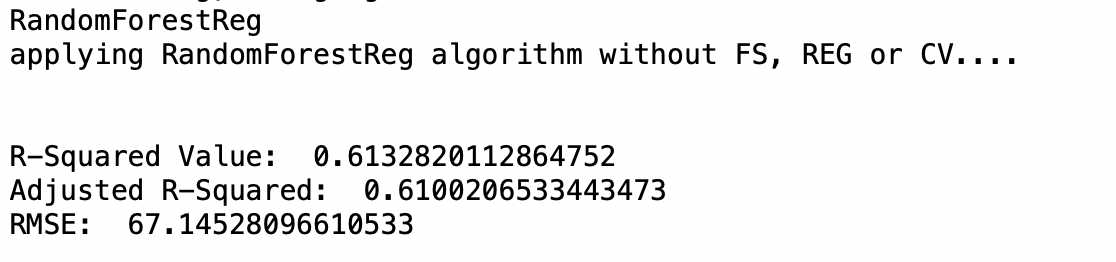

# Part 2: Markov Chain Monte Carlo

In [22]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from pathlib import Path
import pickle
from collections import OrderedDict
import pandas as pd
import numpy as np
from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, 
                             precision_recall_curve) 
from mlxtend.plotting import plot_confusion_matrix

import theano
import pymc3 as pm
from pymc3.variational.callbacks import CheckParametersConvergence
import statsmodels.formula.api as smf

import arviz as az
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
from IPython.display import HTML

**Models**

In [23]:
data = df

data_path = Path('data')
fig_path = Path('figures')
model_path = Path('models')
for p in [data_path, fig_path, model_path]:
    if not p.exists():
        p.mkdir()

In [24]:
data.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'total_energy', 'date_year', 'date_month', 'date_week',
       'date_day', 'date_hour', 'date_minute', 'date_dayofweek'],
      dtype='object')

In [25]:
simple_model = 'total_energy ~ T1 + T2 + T3'
full_model = 'total_energy ~ T1 + T2 + T3 + date_year + date_month +  date_day + date_hour + date_minute +  date_dayofweek + Press_mm_hg'

**MAP Inference**

A probabilistic program consists of observed and unobserved random variables. We define the observed RVs via likelihood distributions and unobserved RVs via prior distributions. PyMC3 includes numerous probability distributions for this purpose.

Logistic regression models the probability that individual i subscribes to a deposit based on  k features.

**Manual Model Specification**

We will use the context manager with to define a manual_logistic_model that we can refer to later as a probabilistic model:

* The random variables for the unobserved parameters for intercept and features are expressed using uninformative priors that assume normal distributions with mean  0 and standard deviation of  100.

* The likelihood combines the parameters with the data according to the specification of the logistic regression.

* The outcome is modeled as a Bernoulli RV with success probability given by the likelihood.

In [26]:
with pm.Model() as manual_logistic_model:
    # random variables for coefficients with
    # uninformative priors for each parameter

    intercept = pm.Normal('intercept', 0, sd=100)
    beta_1 = pm.Normal('beta_1', 0, sd=100)
    beta_2 = pm.Normal('beta_2', 0, sd=100)
    beta_3 = pm.Normal('beta_3', 0, sd=100)

    # Transform random variables into vector of probabilities p(y_i=1)
    # according to logistic regression model specification.
    likelihood = pm.invlogit(intercept + beta_1 * data.T1 + beta_2 * data.T2 + beta_3 * data.T3)

    # Bernoulli random vector with probability of success
    # given by sigmoid function and actual data as observed
    pm.Bernoulli(name='logit', p=likelihood, observed=data.total_energy)

In [27]:
manual_logistic_model.model

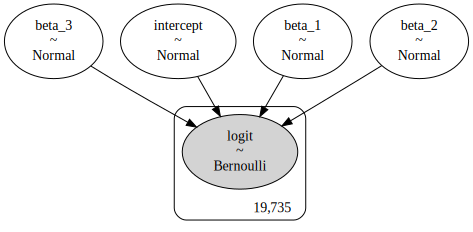

In [28]:
pm.model_to_graphviz(manual_logistic_model)


**GLM Model**

PyMC3 includes numerous common models so that we can usually leave the manual specification for custom applications.
The following code defines the same logistic regression as a member of the Generalized Linear Models (GLM) family.

In [29]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula(simple_model,
                            data,
                            family=pm.glm.families.Binomial())

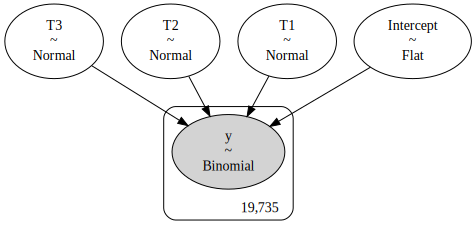

In [30]:
pm.model_to_graphviz(logistic_model)

PyMC3 solves the optimization problem of finding the posterior point with the highest density BFGS algorithm but offers several alternatives provided by the scipy library. The result is virtually identically to the corresponding statsmodels estimate.

### Markov Chain Monte Carlo

Markov chains are stochastic models that describe sequences of possible events. Each event comes from a set of outcomes, and each outcome determines which outcome occurs next, according to a fixed set of probabilities. An important feature of Markov chains is that they are memoryless: everything that you would possibly need to predict the next event is available in the current state, and no new information comes from knowing historical events.
Monte Carlo methods rely on repeated random sampling to approximate results that may be deterministic, but that does not permit an analytic, exact solution.
Many algorithms apply the Monte Carlo method to a Markov Chain, and generally proceed as follows:

- Start at the current position.
- Draw a new position from a proposal distribution.
- Evaluate the probability of the new position in light of data and prior distributions:
- If sufficiently likely, move to the new position
- Otherwise, remain at the current position
- Repeat from step 1.
- After a given number of iterations, return all accepted positions.

In [31]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula(formula=full_model,
                            data=data,
                            family=pm.glm.families.Binomial())

In [32]:
logistic_model.basic_RVs

[Intercept ~ Flat,
 T1 ~ Normal,
 T2 ~ Normal,
 T3 ~ Normal,
 date_year ~ Normal,
 date_month ~ Normal,
 date_day ~ Normal,
 date_hour ~ Normal,
 date_minute ~ Normal,
 date_dayofweek ~ Normal,
 Press_mm_hg ~ Normal,
 y ~ Binomial]

**Hamiltonian Monte Carlo – going NUTS**

By default, PyMC3 automatically selects the most efficient sampler and initializes the sampling process for efficient convergence. For a continuous model, PyMC3 chooses the NUTS sampler. It also runs variational inference via ADVI to find good starting parameters for the sampler.

Hamiltonian Monte Carlo (HMC) is a hybrid method that leverages the first-order derivative information of the gradient of the likelihood to propose new states for exploration and overcome some of the challenges of MCMC. In addition, it incorporates momentum to efficiently jump around the posterior. As a result, it converges faster to a high-dimensional target distribution than simpler random-walk Metropolis or Gibbs sampling.

**To see what the convergence looks like, we first draw  1,000 samples after tuning the sampler for 1,000 iterations that will be discarded. The sampling process can be parallelized for multiple chains using the cores argument.**

In [33]:
with logistic_model:
    trace = pm.sample(tune=1000,
                         draws=1000,
                         chains=4,
                         init = 'adapt_diag',
                         cores=3)

SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'Intercept': array(0.), 'T1': array(0.), 'T2': array(0.), 'T3': array(0.), 'date_year': array(0.), 'date_month': array(0.), 'date_day': array(0.), 'date_hour': array(0.), 'date_minute': array(0.), 'date_dayofweek': array(0.), 'Press_mm_hg': array(0.)}

Initial evaluation results:
Intercept         0.00
T1               -7.83
T2               -7.83
T3               -7.83
date_year        -7.83
date_month       -7.83
date_day         -7.83
date_hour        -7.83
date_minute      -7.83
date_dayofweek   -7.83
Press_mm_hg      -7.83
y                 -inf
Name: Log-probability of test_point, dtype: float64

**Inspect Trace**

In [34]:
pm.plot_trace(trace);

NameError: name 'trace' is not defined

In [35]:
with open(model_path / 'logistic_model_mh.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model, 'trace': trace}, buff)

NameError: name 'trace' is not defined

PyMC3 produces various summary statistics for a sampler. These are available as individual functions in the stats module, or by providing a trace to the pm.summary() function shown below.

In [36]:
pm.summary(trace)

NameError: name 'trace' is not defined

In [37]:
draws = 100

trace_df = pm.trace_to_dataframe(trace).assign(
    chain=lambda x: x.index // draws)

trace_df.info()

NameError: name 'trace' is not defined

**Persist Results**

In [38]:
with open(model_path / 'logistic_model_nuts.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model,
                 'trace': trace}, buff)

NameError: name 'trace' is not defined

In [39]:
with open(model_path / 'logistic_model_nuts.pkl', 'rb') as buff:
    data0 = pickle.load(buff)  

logistic_model, trace_NUTS = data0['model'], data0['trace']

EOFError: Ran out of input

**Combine Traces**

In [40]:
draws = 10000

df = pm.trace_to_dataframe(trace_NUTS).iloc[200:].reset_index(
    drop=True).assign(chain=lambda x: x.index // draws)

trace_df = pd.concat([trace_df.assign(samples=100),
                      df.assign(samples=10000)])
trace_df.info()

NameError: name 'trace_NUTS' is not defined

**Visualize both traces**

In [41]:
trace_df_long = pd.melt(trace_df, id_vars=['samples', 'chain'])
trace_df_long.info()

NameError: name 'trace_df' is not defined

**Convergence**

We can visualize the samples over time and their distributions to check the quality of the results. The following charts show the posterior distributions after an initial  100 and an additional  10,000 samples, respectively, and illustrate how convergence implies that multiple chains identify the same distribution. The pm.trace_plot() function shows the evolution of the samples as well.

In [42]:
g = sns.FacetGrid(trace_df_long, col='variable', row='samples',
                  hue='chain', sharex='col', sharey=False)
g = g.map(sns.distplot, 'value', hist=False, rug=False)

NameError: name 'trace_df_long' is not defined

**Estimate Odds Ratio**

An odds ratio (OR) is a measure of association between a certain property A and a second property B in a population. Specifically, it tells you how the presence or absence of property A has an effect on the presence or absence of property B.

The OR is also used to figure out if a particular exposure (like eating processed meat) is a risk factor for a particular outcome (such as colon cancer), and to compare the various risk factors for that outcome. As long as you have two properties you think are linked, you can calculate the odds.

In [43]:
b = trace['duration']
lb, ub = np.percentile(b, 2.5), np.percentile(b, 97.5)
lb, ub = np.exp(lb), np.exp(ub)
print(f'P({lb:.3f} < Odds Ratio < {ub:.3f}) = 0.95')

NameError: name 'trace' is not defined

We can interpret something along those lines: "With probability  0.95 the odds ratio is greater than  5.299 and less than  6.224 so the duration effect takes place because a person with a longer duration has at least  5.299 higher probability to subscribe to a term deposit than a person with a lower duration, while holding all the other variables constant.

**Computing Credible Intervals**

We can compute the credible intervals, the Bayesian counterpart of confidence intervals, as percentiles of the trace. The resulting boundaries reflect our confidence about the range of the parameter value for a given probability threshold, as opposed to the number of times the parameter will be within this range for a large number of trials.

NameError: name 'b' is not defined

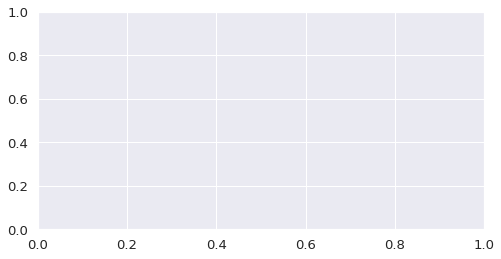

In [44]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.distplot(np.exp(b), axlabel='Odds Ratio', ax=ax)
ax.set_title(f'Credible Interval: P({lb:.3f} < Odds Ratio < {ub:.3f}) = 0.95')
ax.axvspan(lb, ub, alpha=0.5, color='gray');

**Variational Inference**


Variational Inference (VI) is a machine learning method that approximates probability densities through optimization. In the Bayesian context, it approximates the posterior distribution as follows:

1. Select a parametrized family of probability distributions
2. Find the member of this family closest to the target, as measured by Kullback-Leibler divergence


Compared to MCMC, Variational Bayes tends to converge faster and scales to large data better. While MCMC approximates the posterior with samples from the chain that will eventually converge arbitrarily close to the target, variational algorithms approximate the posterior with the result of the optimization, which is not guaranteed to coincide with the target.

Variational Inference is better suited for large datasets and to quickly explore many models.In contrast, MCMC will deliver more accurate results on smaller datasets or when time and computational resources pose fewer constraints.

**Run Automatic Differentation Variational Inference (ADVI)**

The interface for variational inference is very similar to the MCMC implementation. We just use the fit() instead of the sample() function, with the option to include an early stopping CheckParametersConvergence callback if the distribution-fitting process converged up to a given tolerance:

In [45]:
with logistic_model:
    callback = CheckParametersConvergence(diff='absolute')
    approx = pm.fit(n=100000, callbacks=[callback])

**Persist Result**

In [46]:
with open(model_path / 'logistic_model_advi.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model,
                 'approx': approx}, buff)

**Sample from approximated distribution**

We can draw samples from the approximated distribution to obtain a trace object as above for the MCMC sampler:

In [47]:
trace_advi = approx.sample(2000)

In [48]:
pm.summary(trace_advi)

Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.416,20.924,-41.655,37.969,0.473,0.337,1972.0,2004.0,NaN
T1,-0.525,20.602,-38.477,37.494,0.454,0.331,2062.0,1956.0,NaN
T2,-0.922,21.212,-39.787,38.747,0.476,0.346,1985.0,1845.0,NaN
T3,-0.530,20.481,-37.349,38.182,0.430,0.334,2268.0,2004.0,NaN
date_year,-0.277,21.605,-42.597,38.080,0.476,0.359,2066.0,1820.0,NaN
date_month,0.418,20.998,-38.349,40.255,0.485,0.343,1853.0,1926.0,NaN
date_day,-0.327,21.048,-38.797,39.131,0.476,0.352,1949.0,1821.0,NaN
date_hour,-0.574,20.648,-39.945,37.533,0.465,0.336,1962.0,1959.0,NaN
date_minute,-0.323,21.108,-41.986,38.425,0.467,0.340,2044.0,2003.0,NaN
date_dayofweek,0.214,21.332,-37.880,42.286,0.473,0.334,2038.0,1921.0,NaN


Let us visualize the covariance structure of the model

In [49]:
az.plot_pair(trace_NUTS, figsize=(10, 10));

NameError: name 'trace_NUTS' is not defined

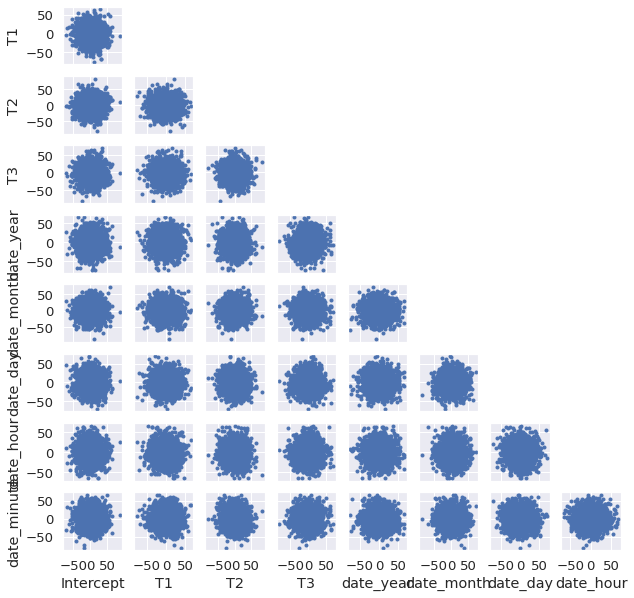

In [50]:
az.plot_pair(trace_advi, figsize=(10, 10));

Clearly, ADVI does not capture (as expected) the interactions between variables because of the mean field approximation, and so it underestimates the overall variance.

**Model Diagnostics**

Bayesian model diagnostics includes validating that the sampling process has converged and consistently samples from high-probability areas of the posterior, and confirming that the model represents the data well.

For high-dimensional models with many variables, it becomes cumbersome to inspect numerous traces. When using NUTS, the energy plot helps to assess problems of convergence. It summarizes how efficiently the random process explores the posterior. The plot shows the energy and the energy transition matrix that should be well matched as in the below example.

**Energy Plot**

When using NUTS, the energy plot helps to assess problems of convergence. It summarizes how efficiently the random process explores the posterior. The plot shows the energy and the energy transition matrix, which should be well-matched.

In [51]:
pm.energyplot(trace_NUTS)

NameError: name 'trace_NUTS' is not defined

**Forest Plot**


A forest plot, also known as a blobbogram, is a graphical display of estimated results from a number of scientific studies addressing the same question, along with the overall results. It was developed for use in medical research as a means of graphically representing a meta-analysis of the results of randomized controlled trials.

In [52]:
az.plot_forest([trace_advi, trace_NUTS])

NameError: name 'trace_NUTS' is not defined

**Posterior Plot**

In [53]:
pm.plot_posterior(trace_NUTS)

NameError: name 'trace_NUTS' is not defined

**Posterior Predictive Checks**

PPCs are very useful for examining how well a model fits the data. They do so by generating data from the model using parameters from draws from the posterior. We use the function pm.sample_ppc for this purpose and obtain n samples for each observation (the GLM module automatically names the outcome y):

In [54]:
ppc = pm.sample_posterior_predictive(trace_NUTS, samples=500, model=logistic_model)

NameError: name 'trace_NUTS' is not defined

In [55]:
ppc['y'].shape

NameError: name 'ppc' is not defined

**Check AUC Score**

In [56]:
y_score = np.mean(ppc['y'], axis=0)

NameError: name 'ppc' is not defined

In [57]:
pred_scores = dict(y_true=data.total_energy,y_score=y_score)
roc_auc_score(**pred_scores)

NameError: name 'y_score' is not defined

## Prediction

Predictions use theano’s shared variables to replace the training data with test data before running posterior predictive checks. To facilitate visualization, we create the train and test datasets, and convert the former to a shared variable. Note that we need to use numpy arrays and provide a list of column labels:

In [58]:
#Train-test split

X = data.drop('total_energy', axis=1)
y = data.total_energy
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
labels = X_train.columns

In [59]:
#Create shared theano variable

X_shared = theano.shared(X_train.values)

In [60]:
# Define logistic model

with pm.Model() as logistic_model_pred:
    pm.glm.GLM(x=X_shared, labels=labels,
               y=y_train, family=pm.glm.families.Binomial())

**Run NUTS sampler**

In [61]:
with logistic_model_pred:
    pred_trace = pm.sample(draws=1000, 
                           tune=1000,
                           chains=2,
                           cores=2,
                           init='adapt_diag')

SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'Intercept': array(0.), 'T1': array(0.), 'RH_1': array(0.), 'T2': array(0.), 'RH_2': array(0.), 'T3': array(0.), 'RH_3': array(0.), 'T4': array(0.), 'RH_4': array(0.), 'T5': array(0.), 'RH_5': array(0.), 'T6': array(0.), 'RH_6': array(0.), 'T7': array(0.), 'RH_7': array(0.), 'T8': array(0.), 'RH_8': array(0.), 'T9': array(0.), 'RH_9': array(0.), 'T_out': array(0.), 'Press_mm_hg': array(0.), 'RH_out': array(0.), 'Windspeed': array(0.), 'Visibility': array(0.), 'Tdewpoint': array(0.), 'rv1': array(0.), 'rv2': array(0.), 'date_year': array(0.), 'date_month': array(0.), 'date_week': array(0.), 'date_day': array(0.), 'date_hour': array(0.), 'date_minute': array(0.), 'date_dayofweek': array(0.)}

Initial evaluation results:
Intercept         0.00
T1               -7.83
RH_1             -7.83
T2               -7.83
RH_2             -7.83
T3               -7.83
RH_3             -7.83
T4               -7.83
RH_4             -7.83
T5               -7.83
RH_5             -7.83
T6               -7.83
RH_6             -7.83
T7               -7.83
RH_7             -7.83
T8               -7.83
RH_8             -7.83
T9               -7.83
RH_9             -7.83
T_out            -7.83
Press_mm_hg      -7.83
RH_out           -7.83
Windspeed        -7.83
Visibility       -7.83
Tdewpoint        -7.83
rv1              -7.83
rv2              -7.83
date_year        -7.83
date_month       -7.83
date_week        -7.83
date_day         -7.83
date_hour        -7.83
date_minute      -7.83
date_dayofweek   -7.83
y                 -inf
Name: Log-probability of test_point, dtype: float64

**Replace shared variable with test set**

We then run the sampler as before, and apply the pm.sample_ppc function to the resulting trace after replacing the train with test data:

In [62]:
X_shared.set_value(X_test)

In [63]:
ppc = pm.sample_posterior_predictive(pred_trace,
                    model=logistic_model_pred,
                    samples=100)

NameError: name 'pred_trace' is not defined

**AUC Score**

In [64]:
y_score = np.mean(ppc['y'], axis=0)
roc_auc_score(y_score=np.mean(ppc['y'], axis=0), 
              y_true=y_test)

NameError: name 'ppc' is not defined

In [65]:
pred_scores = dict(y_true=y_test, y_score=y_score)
cols = ['False Positive Rate', 'True Positive Rate', 'threshold']
roc = pd.DataFrame(dict(zip(cols, roc_curve(**pred_scores))))

NameError: name 'y_score' is not defined

**Precision and Recall Curve**

In [66]:
precision, recall, ts = precision_recall_curve(y_true=y_test, probas_pred=y_score)
pr_curve = pd.DataFrame({'Precision': precision, 'Recall': recall})

NameError: name 'y_score' is not defined

**F1 - Score**

In [67]:
f1 = pd.Series({t: f1_score(y_true=y_test, y_pred=y_score>t) for t in ts})
best_threshold = f1.idxmax()

NameError: name 'ts' is not defined

**Plotting Results of Evaluation**

NameError: name 'roc' is not defined

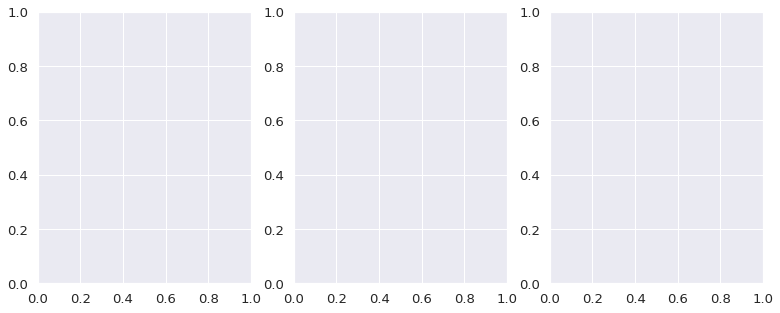

In [68]:
fig, axes = plt.subplots(ncols=3, figsize=(13, 5))

ax = sns.scatterplot(x='False Positive Rate', y='True Positive Rate', data=roc, s=50, legend=False, ax=axes[0])
axes[0].plot('False Positive Rate', 'True Positive Rate', data=roc, lw=1, color='k')
axes[0].plot(np.linspace(0,1,100), np.linspace(0,1,100), color='k', ls='--', lw=1)
axes[0].fill_between(y1=roc['True Positive Rate'], x=roc['False Positive Rate'], alpha=.3, color='red')
axes[0].set_title('Receiver Operating Characteristic')


sns.scatterplot(x='Recall', y='Precision', data=pr_curve, ax=axes[1])
axes[1].set_ylim(0,1)
axes[1].set_title('Precision-Recall Curve')


f1.plot(ax=axes[2], title='F1 Scores', ylim=(0,1))
axes[2].set_xlabel('Threshold')
axes[2].axvline(best_threshold, lw=1, ls='--', color='k')
#axes[2].text(text=f'Max F1 @ {best_threshold:.2f}', x=.60, y=.95, s=5)
fig.suptitle(f'roc_auc_score = {round(roc_auc_score(**pred_scores),2)}', fontsize=24)
fig.tight_layout()
plt.subplots_adjust(top=.8)
plt.show()

In [69]:
#Validation metrics for Regression algorithms
def validationmetrics_reg(model,testX,testY, verbose=True):
    predictions = model.predict(testX)
    
    # R-squared
    r2 = r2_score(testY,predictions)
    
    # Adjusted R-squared
    r2_adjusted = 1-(1-r2)*(testX.shape[0]-1)/(testX.shape[0]-testX.shape[1]-1)
    
    # MSE
    mse = mean_squared_error(testY,predictions)
    
    #RMSE
    rmse = math.sqrt(mse)
    
    if verbose:
        print("R-Squared Value: ", r2)
        print("Adjusted R-Squared: ", r2_adjusted)
        print("RMSE: ", rmse)
    
    res_map = {
                "r2": r2,
                "r2_adjusted": r2_adjusted,
                "rmse": rmse,
                "model_obj": model
              }
    return res_map